<a href="https://colab.research.google.com/github/adijoy10/my_projects/blob/main/vaccine_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from  matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [ ]:
### problem statement https://www.kaggle.com/competitions/prediction-of-h1n1-vaccination/data

here in this problem "h1n1_vaccine" is the dependent variable,we will use logistic regression algorithm ,because it is a classification dataset. ALSO WE WILL USE DECESION TREE CLASSIFICTATION.

In [ ]:
df.sample(15)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
9250,9250,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"> $75,000",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,1
13631,13631,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,NaN,NaN,NaN,NaN,"MSA, Not Principle City",1.0,1.0,0
8504,8504,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
26294,26294,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"> $75,000",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
7989,7989,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
11124,11124,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Female,NaN,NaN,NaN,NaN,"MSA, Not Principle City",2.0,0.0,0
6610,6610,1.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
13591,13591,3.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",0.0,0.0,0
24355,24355,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Not in Labor Force,Non-MSA,1.0,0.0,0
22606,22606,2.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,White,Female,"> $75,000",Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0


In [ ]:
df.dtypes

unique_id                      int64
h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
income_level                  object
m

In [ ]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

the  int and float missing values will be replaced by the corresponding mean of the specific column.and we will do one hot enconding for object data types columns,

also we will remove "has_health_insur" because 50 percent of its data set is missing

In [ ]:
df.shape

(26707, 34)

In [ ]:
df.describe()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [ ]:
df=df.drop(labels='unique_id',axis=1)

In [ ]:
df=df.drop(labels='has_health_insur',axis=1)

In [ ]:
df.sample(5)

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
25257,3.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,Below Poverty,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
23380,2.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,1.0,0
17744,1.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,White,Male,"> $75,000",Not Married,Own,Employed,Non-MSA,2.0,1.0,0
17135,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,Hispanic,Female,Below Poverty,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",1.0,0.0,0
12525,2.0,2.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,NaN,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,Non-MSA,1.0,0.0,0


In [ ]:
mean=df['h1n1_worry'].mean()

In [ ]:
mean1=df['h1n1_awareness'].mean()
mean2=df['antiviral_medication'].mean()
mean3=df['contact_avoidance'].mean()
mean4=df['bought_face_mask'].mean()
mean5=df['wash_hands_frequently'].mean()
mean6=df['avoid_large_gatherings'].mean()
mean7=df['reduced_outside_home_cont'].mean()
mean8=df['avoid_touch_face'].mean()
mean9=df['dr_recc_h1n1_vacc'].mean()
mean10=df['dr_recc_seasonal_vacc'].mean()
mean11=df['chronic_medic_condition'].mean()
mean12=df['cont_child_undr_6_mnths'].mean()
mean13=df['is_health_worker'].mean()
mean14=df['is_h1n1_vacc_effective'].mean()
mean15=df['is_h1n1_risky'].mean()
mean16=df['is_seas_vacc_effective'].mean()
mean17=df['is_seas_risky'].mean()
mean18=df['sick_from_seas_vacc'].mean()
mean19=df['no_of_adults'].mean()
mean20=df['no_of_children'].mean()
mean21=df['sick_from_h1n1_vacc'].mean()

In [ ]:
df=pd.get_dummies(df,columns=['qualification'])
df=pd.get_dummies(df,columns=['age_bracket'])
df=pd.get_dummies(df,columns=['race'])
df=pd.get_dummies(df,columns=['sex'])
df=pd.get_dummies(df,columns=['income_level'])
df=pd.get_dummies(df,columns=['marital_status'])
df=pd.get_dummies(df,columns=['housing_status'])
df=pd.get_dummies(df,columns=['employment'])
df=pd.get_dummies(df,columns=['census_msa'])

In [ ]:
df.dtypes

h1n1_worry                                float64
h1n1_awareness                            float64
antiviral_medication                      float64
contact_avoidance                         float64
bought_face_mask                          float64
wash_hands_frequently                     float64
avoid_large_gatherings                    float64
reduced_outside_home_cont                 float64
avoid_touch_face                          float64
dr_recc_h1n1_vacc                         float64
dr_recc_seasonal_vacc                     float64
chronic_medic_condition                   float64
cont_child_undr_6_mnths                   float64
is_health_worker                          float64
is_h1n1_vacc_effective                    float64
is_h1n1_risky                             float64
sick_from_h1n1_vacc                       float64
is_seas_vacc_effective                    float64
is_seas_risky                             float64
sick_from_seas_vacc                       float64


In [ ]:
df['h1n1_awareness'].replace(to_replace=np.nan,value=mean1,inplace=True)
df['h1n1_worry'].replace(to_replace=np.nan,value=mean,inplace=True)
df['antiviral_medication'].replace(to_replace=np.nan,value=mean2,inplace=True)
df['contact_avoidance'].replace(to_replace=np.nan,value=mean3,inplace=True)
df['bought_face_mask'].replace(to_replace=np.nan,value=mean4,inplace=True)
df['wash_hands_frequently'].replace(to_replace=np.nan,value=mean5,inplace=True)
df['avoid_large_gatherings'].replace(to_replace=np.nan,value=mean6,inplace=True)
df['reduced_outside_home_cont'].replace(to_replace=np.nan,value=mean7,inplace=True)
df['avoid_touch_face'].replace(to_replace=np.nan,value=mean8,inplace=True)
df['dr_recc_h1n1_vacc'].replace(to_replace=np.nan,value=mean9,inplace=True)
df['dr_recc_seasonal_vacc'].replace(to_replace=np.nan,value=mean10,inplace=True)
df['chronic_medic_condition'].replace(to_replace=np.nan,value=mean11,inplace=True)
df['cont_child_undr_6_mnths'].replace(to_replace=np.nan,value=mean12,inplace=True)
df['is_health_worker'].replace(to_replace=np.nan,value=mean13,inplace=True)
df['is_h1n1_vacc_effective'].replace(to_replace=np.nan,value=mean14,inplace=True)
df['is_h1n1_risky'].replace(to_replace=np.nan,value=mean15,inplace=True)
df['is_seas_vacc_effective'].replace(to_replace=np.nan,value=mean16,inplace=True)
df['is_seas_risky'].replace(to_replace=np.nan,value=mean17,inplace=True)
df['sick_from_seas_vacc'].replace(to_replace=np.nan,value=mean18,inplace=True)
df['no_of_adults'].replace(to_replace=np.nan,value=mean19,inplace=True)
df['no_of_children'].replace(to_replace=np.nan,value=mean20,inplace=True)
df['sick_from_h1n1_vacc'].replace(to_replace=np.nan,value=mean21,inplace=True)





In [ ]:
df.isnull().sum()

h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                              0
no_of_children                            0
h1n1_vaccine                    

In [ ]:
duplicate=df.duplicated()
duplicate.sum()

7

In [ ]:
df=df.drop_duplicates() ### duplicated data is removed

In [ ]:
df.isnull().sum()

h1n1_worry                                0
h1n1_awareness                            0
antiviral_medication                      0
contact_avoidance                         0
bought_face_mask                          0
wash_hands_frequently                     0
avoid_large_gatherings                    0
reduced_outside_home_cont                 0
avoid_touch_face                          0
dr_recc_h1n1_vacc                         0
dr_recc_seasonal_vacc                     0
chronic_medic_condition                   0
cont_child_undr_6_mnths                   0
is_health_worker                          0
is_h1n1_vacc_effective                    0
is_h1n1_risky                             0
sick_from_h1n1_vacc                       0
is_seas_vacc_effective                    0
is_seas_risky                             0
sick_from_seas_vacc                       0
no_of_adults                              0
no_of_children                            0
h1n1_vaccine                    

In [ ]:
X=df.drop(['h1n1_vaccine'],axis=1)
y=df[['h1n1_vaccine']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)

FINALLY WE USE LOGISTIC REGRESSION MODEL

In [ ]:
model=LogisticRegression()


In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model.score(X_train,y_train)

0.8343499197431782

In [ ]:
model.score(X_test,y_test)

0.834956304619226

WE GET A SOCRE OF 83.34 FOR TRAIN DATA AND 83.49 FOR TEST DATA WHILE USING LOGISTIC REGRESSION

In [ ]:
predictions=model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.834956304619226

In [ ]:
from sklearn import metrics

<Axes: >

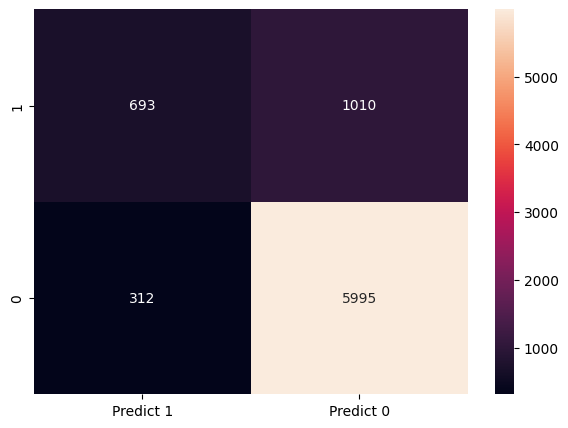

In [ ]:
cm=metrics.confusion_matrix(y_test,predictions,labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in["1","0"]],
                   columns=[i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize=(7,5))
sns.heatmap(df_cm,annot=True,fmt='g')

In [ ]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6307
           1       0.69      0.41      0.51      1703

    accuracy                           0.83      8010
   macro avg       0.77      0.68      0.71      8010
weighted avg       0.82      0.83      0.82      8010



here we get an accuarcy of 83 percent,with the help of confusion matrix.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model_2=DecisionTreeClassifier()
model_2.fit(X_train,y_train)
print(model_2.score(X_train,y_train))

0.9999464954521134


In [ ]:
print(model_2.score(X_test,y_test))

0.751685393258427


In [ ]:
model_2=DecisionTreeClassifier(max_depth=9,criterion='gini')
model_2.fit(X_train,y_train)
print(model_2.score(X_train,y_train))
print(model_2.score(X_test,y_test))

0.8659176029962546
0.821972534332085


BY USING DECESION TREE CLASSIFIER WE GET 86.58 FOR THE TRAIN DATA AND 82.21 FOR THE TEST DATA,WHICH IS SLIGHTY BETTER THAN THE SOCRE GIVEN BY OUR LOGISTIC REGRESSION MODEL

SUBMITTED BY ADITYA KUMAR SINHA
EMAIL ID:aditya.ei21@bmsce.ac.in